# EDA: 문제 난이도 분석 PART

In [2]:
import numpy as np
import pandas as pd

from tqdm import tqdm
from collections import Counter, defaultdict
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# train_data.csv 불러오기
train_df = pd.read_csv("/opt/ml/input/data/train_data.csv")
train_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [6]:
train_df.corr()

,userID,answerCode,KnowledgeTag
userID,1.000000,-0.035235,-0.015064
answerCode,-0.035235,1.000000,0.012086
KnowledgeTag,-0.015064,0.012086,1.000000


In [3]:
# test_data.csv 불러오기
test_df = pd.read_csv("/opt/ml/input/data/test_data.csv")
test_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623
...,...,...,...,...,...,...
260109,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832
260110,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832
260111,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244
260112,7439,A040130004,A040000130,1,2020-10-14 23:09:31,8244


## ✅ 문제별(`assessmentItemId`) 정답수, 오답수, 정답률 분포

In [4]:
# 문항별 정답현황 list로 가져오기
groupby_problem = train_df.groupby("assessmentItemID")["answerCode"].apply(list)
groupby_problem

assessmentItemID
A010001001    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...
A010001002    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
A010001003    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ...
A010001004    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...
A010001005    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...
                                    ...                        
A090074002    [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...
A090074003    [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...
A090074004    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...
A090074005    [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...
A090074006    [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, ...
Name: answerCode, Length: 9454, dtype: object

In [5]:
# 문제별로 맞은 사람 수, 틀린 사람수, 정답률 계산
correction = list() # [[문제ID, 맞은사람수, 틀린사람수, 정답률], ...]
for problem, correctness in zip(groupby_problem.index, groupby_problem):
    correction.append([problem, sum(correctness), len(correctness) - sum(correctness), round(sum(correctness) / len(correctness) * 100, 2)])

In [6]:
# 위에서 생성한 list를 이용해서 dataframe을 생성
problem_df = pd.DataFrame(data=correction, columns=["problemId", "correctCnt", "incorrectCnt", "correctRatio"])
problem_df

,problemId,correctCnt,incorrectCnt,correctRatio
0,A010001001,295,22,93.06
1,A010001002,304,13,95.90
2,A010001003,287,30,90.54
3,A010001004,301,16,94.95
4,A010001005,281,36,88.64
...,...,...,...,...
9449,A090074002,20,25,44.44
9450,A090074003,26,19,57.78
9451,A090074004,15,30,33.33
9452,A090074005,18,27,40.00


In [7]:
# 문제별 정답률의 평균
problem_df["correctRatio"].mean()

65.42559763063254

## ✅ 문제별 정답률 구간의 분포

In [9]:
# 정답률을 이용해 10개의 구간으로 분할
problem_df["correct10"] = problem_df["correctRatio"] // 10

[]

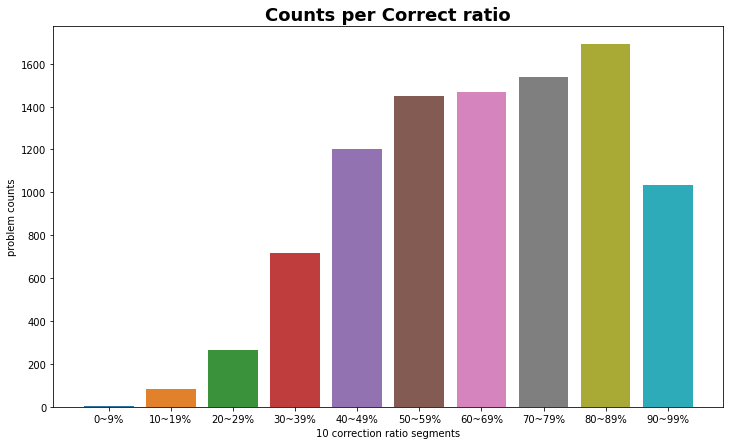

In [10]:
# 각 정답률 구간에 분포하는 문제의 수 측정
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(x="correct10", data=problem_df, ax=ax)
ax.set_xticklabels(["0~9%", "10~19%", "20~29%", "30~39%", "40~49%", "50~59%", "60~69%", "70~79%", "80~89%", "90~99%"])
ax.set_title("Counts per Correct ratio", fontsize="18", fontweight="semibold")
ax.set_xlabel("10 correction ratio segments")
ax.set_ylabel("problem counts")
plt.plot()

## ✅ 가장 많이 맞춰진 상위 30개 TagID

In [12]:
# tag 별 정답 현황 list로 가져오기
tag_df = train_df.groupby("KnowledgeTag")["answerCode"].apply(list)
tag_df

KnowledgeTag
23       [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, ...
24       [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, ...
25       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...
26       [1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...
30       [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...
                               ...                        
11253    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...
11265    [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...
11269    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...
11270    [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, ...
11271    [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: answerCode, Length: 912, dtype: object

In [13]:
# tag별 정답수 측정
tag_correct_cnt = list()
for tagId, correctness in zip(tag_df.index, tag_df):
    tag_correct_cnt.append([tagId, sum(correctness)])

In [16]:
# 맞춘 횟수가 높은 상위 30개의 tag
tag_correct_cnt.sort(key=lambda tag_correct_cnt:tag_correct_cnt[1])
tag_top30 = tag_correct_cnt[-30:]
for tagId, cnt in tag_top30:
    print (f"{tagId}({cnt}), ", end="")

7944(3960), 9931(3965), 7593(3966), 7601(3970), 6456(4014), 7620(4021), 5836(4036), 6453(4049), 6774(4054), 6775(4057), 2053(4063), 10421(4080), 5284(4086), 7618(4158), 2065(4214), 7938(4220), 2125(4222), 6454(4238), 5845(4615), 5814(4719), 5485(4847), 2010(4849), 7596(4958), 7599(5518), 8127(6283), 2085(6585), 8004(6967), 7621(7441), 7600(8377), 7597(10669), 

## ✅ 각 문제별 난이도 설정 (정답수, 오답수 기준)

In [17]:
# 문제별로 맞춘횟수, 틀린횟수를 기준으로 난이도 측정 (easy, hard)
problem_difficulty_df = problem_df[["problemId", "correctCnt", "incorrectCnt"]]
problem_difficulty_df["difficulty"] = problem_difficulty_df.apply(lambda x: "easy" if x["correctCnt"] > x["incorrectCnt"] else "hard", axis=1)
problem_difficulty_df

/tmp/ipykernel_28020/517296909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problem_difficulty_df["difficulty"] = problem_difficulty_df.apply(lambda x: "easy" if x["correctCnt"] > x["incorrectCnt"] else "hard", axis=1)


,problemId,correctCnt,incorrectCnt,difficulty
0,A010001001,295,22,easy
1,A010001002,304,13,easy
2,A010001003,287,30,easy
3,A010001004,301,16,easy
4,A010001005,281,36,easy
...,...,...,...,...
9449,A090074002,20,25,hard
9450,A090074003,26,19,easy
9451,A090074004,15,30,hard
9452,A090074005,18,27,hard


<AxesSubplot:xlabel='difficulty', ylabel='count'>

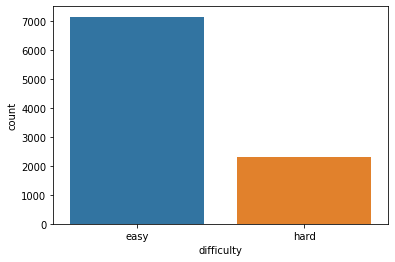

In [19]:
# 위에서 분류한 난이도 기준으로 전체 문제의 난이도 분포 비교
sns.countplot(x="difficulty", data=problem_difficulty_df)

## ✅ 같은 문제를 푼 사람이 있는지 확인

In [20]:
# 유저별로 푼 문항 list로 받아오기
user_df = train_df.groupby("userID")["assessmentItemID"].apply(list)
user_df

userID
0       [A060001001, A060001002, A060001003, A06000100...
1       [A040013001, A040013002, A040013003, A04001300...
2       [A030050001, A030050002, A030050003, A03005000...
5       [A080001001, A080001002, A080001003, A08000100...
6       [A030016001, A030016002, A030016003, A03001600...
                              ...                        
7436    [A050095001, A050095002, A050095003, A05009500...
7437    [A040072001, A040072002, A040072003, A04007200...
7438    [A080002001, A080002002, A080002003, A08000200...
7440    [A050096001, A050096002, A050096005, A05009600...
7441    [A030071001, A030071002, A030071003, A03007100...
Name: assessmentItemID, Length: 6698, dtype: object

In [21]:
# 동일한 문제를 푼 경험이 있는 유저 리스트 생성
unsame_users = list()

for userId, solved_problems in zip(user_df.index, user_df):
    if len(solved_problems) != len(set(solved_problems)):
        unsame_users.append(userId)
        
len(unsame_users)

699

## ✅ 전체 데이터셋에서 정답의 수, 오답의 수

In [22]:
train_answer_df = train_df["answerCode"]
test_answer_df = test_df["answerCode"]

print (f"[train_data.csv] correct({sum(train_answer_df)}), incorrect({len(train_answer_df) - sum(train_answer_df)})")
print (f"[test_data.csv] correct({sum(test_answer_df)}), incorrect({len(test_answer_df) - sum(test_answer_df)})")

[train_data.csv] correct(1483205), incorrect(783381)
[test_data.csv] correct(169639), incorrect(90475)


## ✅ 문제집별 문제의 개수

In [26]:
problemset_df = train_df.groupby("testId")["assessmentItemID"].apply(list)
problemset_df

testId
A010000001    [A010001001, A010001002, A010001003, A01000100...
A010000002    [A010002001, A010002002, A010002003, A01000200...
A010000003    [A010003001, A010003002, A010003003, A01000300...
A010000004    [A010004001, A010004002, A010004003, A01000400...
A010000005    [A010005001, A010005002, A010005003, A01000500...
                                    ...                        
A090000070    [A090070001, A090070002, A090070003, A09007000...
A090000071    [A090071001, A090071002, A090071003, A09007100...
A090000072    [A090072001, A090072002, A090072003, A09007200...
A090000073    [A090073001, A090073002, A090073003, A09007300...
A090000074    [A090074001, A090074004, A090074002, A09007400...
Name: assessmentItemID, Length: 1537, dtype: object

In [28]:
problemset_problemcnt = list()
for problemset in problemset_df:
    problemset_problemcnt.append(len(problemset))

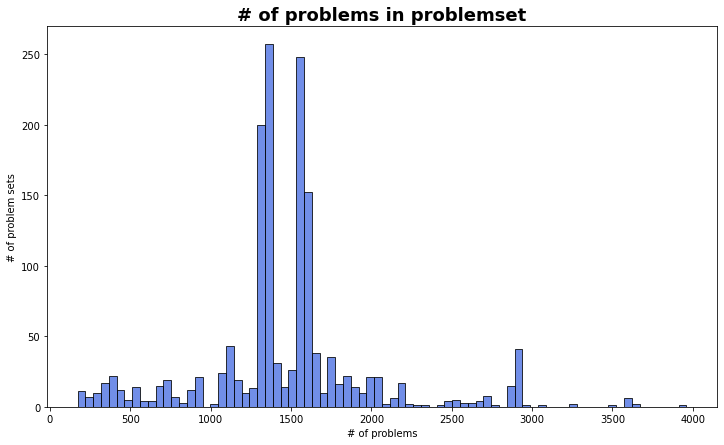

In [38]:
# 문제집별 문제의 수를 histogram으로 나타내기
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(data=problemset_problemcnt, ax=ax, color="royalblue")
ax.set_title("# of problems in problemset", fontsize="18", fontweight="semibold")
ax.set_xlabel("# of problems")
ax.set_ylabel("# of problem sets")
plt.show()

## ✅ 문제집별 정답률 평균, 최소, 최대

In [41]:
grp_problemset_answer = train_df.groupby("testId")["answerCode"].apply(list)
grp_problemset_answer

testId
A010000001    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
A010000002    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
A010000003    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
A010000004    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, ...
A010000005    [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...
                                    ...                        
A090000070    [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
A090000071    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, ...
A090000072    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, ...
A090000073    [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, ...
A090000074    [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...
Name: answerCode, Length: 1537, dtype: object

In [42]:
acc_list = list()
for results in grp_problemset_answer:
    acc = round(sum(results) / len(results) * 100, 2)
    acc_list.append(acc)

In [45]:
print (f"문제집의 최고 정답률 : {max(acc_list)}, 최소 정답률 : {min(acc_list)}, 정답률 평균 : {sum(acc_list) / len(acc_list)}")

문제집의 최고 정답률 : 95.55, 최소 정답률 : 32.72, 정답률 평균 : 66.79814573845155


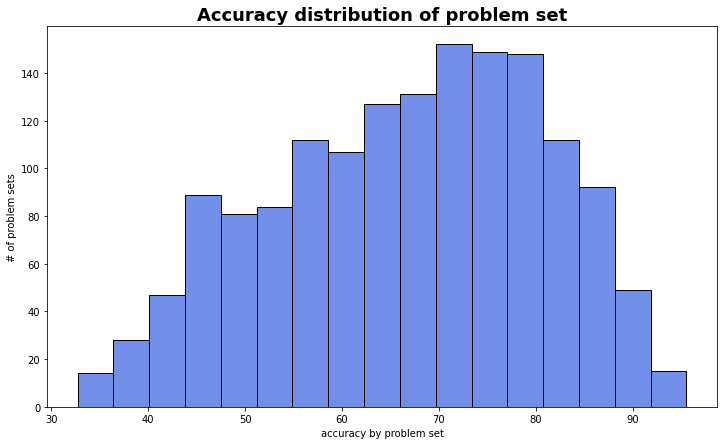

In [47]:
# 문제집별 정답률 분포 파악
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(data=acc_list, ax=ax, color="royalblue")
ax.set_title("Accuracy distribution of problem set", fontsize="18", fontweight="semibold")
ax.set_xlabel("accuracy by problem set")
ax.set_ylabel("# of problem sets")
plt.show()

## ✅ 사용자별 정답률 분포

In [120]:
user_acc_list = train_df.groupby("userID")["answerCode"].apply(list)

In [123]:
user_acc = [round(sum(x) / len(x) * 100) for x in user_acc_list]

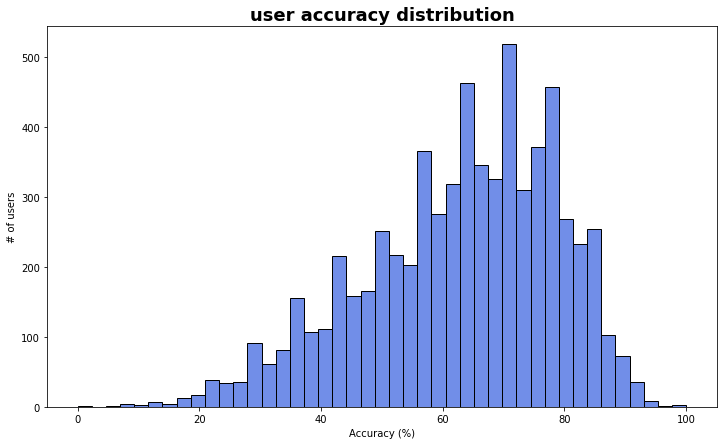

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(user_acc, ax=ax, color="royalblue")
ax.set_title("user accuracy distribution", fontsize=18, fontweight="semibold")
ax.set_xlabel("Accuracy (%)")
ax.set_ylabel("# of users")
plt.show()

In [128]:
np.average(user_acc)

62.888922066288444

## ✅ 사용자별로 1문제를 푸는데 걸리는 시간 평균

In [53]:
# 고유한 유저 아이디 받아오기 (6698개)
user_ids = sorted(train_df["userID"].unique())

In [74]:
# 유저별로 문제를 푸는데 걸린 시간들 list에 저장
user_problem_time = defaultdict(list)

for user in tqdm(user_ids):
    user_info = train_df[train_df["userID"] == user]
    user_info = user_info.sort_values(by="Timestamp")
    for problem_idx in range(0, len(user_info) - 1):
        next_time = user_info.iloc[problem_idx + 1]["Timestamp"]
        cur_time = user_info.iloc[problem_idx]["Timestamp"]
        
        d1 = datetime.strptime(next_time, "%Y-%m-%d %H:%M:%S")
        d2 = datetime.strptime(cur_time, "%Y-%m-%d %H:%M:%S")
        
        diff_time = int((d1 - d2).total_seconds())
        user_problem_time[user].append(diff_time)

100%|██████████| 6698/6698 [08:39<00:00, 12.89it/s] 


In [114]:
min_times = list() # 유저가 가장 짧게 푼 시간
max_times = list() # 유저가 가장 길게 푼 시간
average_times = list() # 유저의 평균 문제풀이 시간

for user in user_problem_time.keys():
    min_times.append(min(user_problem_time[user]))
    max_times.append(max(user_problem_time[user]))
    average_times.append(np.average(user_problem_time[user]))
    
# 약 6000초 이상 걸린 것들은 중간에 다른 것을 했다고 봐도,,
print (f"유저들이 문제를 푸는데 걸린 가장 적은 시간 : {min(min_times)} 초")
print (f"유저들이 문제를 푸는데 걸린 가장 긴 시간 : {max(max_times)} 초")
print (f"유저 각각 문제를 푸는데 걸린 평균 시간들의 평균 : {np.average(average_times)} 초")

유저들이 문제를 푸는데 걸린 가장 적은 시간 : 0 초
유저들이 문제를 푸는데 걸린 가장 긴 시간 : 25602295 초
유저 각각 문제를 푸는데 걸린 평균 시간들의 평균 : 141565.44117002437 초


In [115]:
# 30분 이상 문제풀이에 소모되는 것들 제외하고 계산
user_times = list()
for user in user_problem_time.keys():
    np_user = np.array(user_problem_time[user])
    times = np.where(np_user < 1800)
    user_times.extend(np_user[times])
    
print (f"전체 유저에 대해 30분 이하로 푼 문제 중, 걸린 시간의 평균 : {np.average(user_times)} 초")

전체 유저에 대해 30분 이하로 푼 문제 중, 걸린 시간의 평균 : 72.58905626442966 초


In [132]:
tag_prob_df = train_df.groupby("KnowledgeTag")["assessmentItemID"].apply(list)

In [139]:
ntag = list()
for tag in train_df["KnowledgeTag"].unique():
    ntag.append(len(tag_prob_df[tag]))

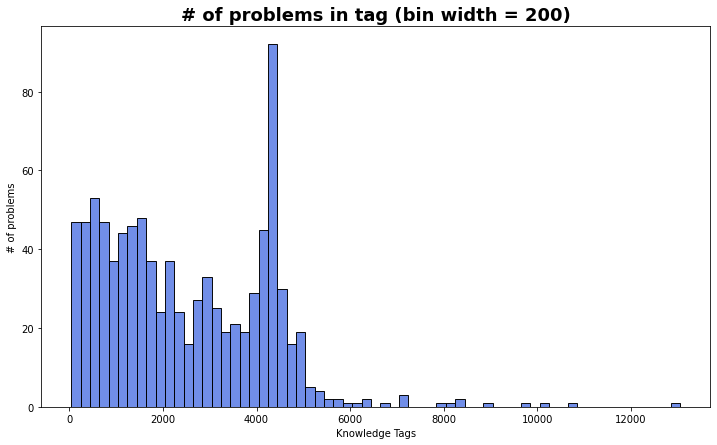

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(ntag, ax=ax, color="royalblue", binwidth=200)
ax.set_title("# of problems in tag (bin width = 200)", fontsize=18, fontweight="semibold")
ax.set_xlabel("Knowledge Tags")
ax.set_ylabel("# of problems")
plt.show()

In [ ]:
# 문제풀이 시간과 문제의 정답률 간의 비교 (쉬운 문제는 빨리 푼다)


In [ ]:
# 문제풀이 시간과 문제의 정답수 + 오답수 비교 (well known 문제는 빨리 푼다)